## Verwendete Python Bibliotheken: <a name="verwendete-python-bibs"></a>
- Vorraussetzung: Pip Paketmanager
- Paketinstallationen können durch Ausführen des Notebook-Code-Blocks durchgeführt werden

In [ ]:
! pip install pylatex==1.4.1                                                                   # 1.4.1
! pip install ipykernel=6.17.1                                                                 # 6.17.1
! pip install ipython==8.7.0                                                                   # 8.7.0
! pip install jupyter_client==7.4.7                                                            # 7.4.7
! pip install jupyter_core==5.1.0                                                              # 5.1.0
! pip install latexcodec2.0.1                                                                  # 2.0.1
! pip install matplotlib-inline==0.1.6                                                         # 0.1.6
! pip install plotly==5.11.0                                                                   # 5.11.0
! pip install Sphinx (                                                                         # 5.3.0
!   applehelp==1.0.2,                                                                           # 1.0.2 
!   bibtex==2.5.0,                                                                              # 2.5.0
!   devhelp==1.0.2,                                                                             # 1.0.2
!   htmlhelp==2.0.0,                                                                            # 2.0.0
!   jsmath==1.0.2,                                                                              # 1.0.1
!   qthelp==1.0.3,                                                                              # 1.0.3
!   serializinghtml==1.1.5                                                                      # 1.1.5
! )
! pip install numpy==1.22.0                                                                    # 1.22.0

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: 'ipykernel=6.17.1'
Hint: = is not a valid operator. Did you mean == ?


## Verwendete VSCode Extensions <a name="verwendete-vscode-extensions"></a>

In [ ]:
# IntelliCode                   v.1.2.29                by Microsoft
# Jupyter                       v2022.11.1003412109     by Microsoft
# Jupyter Cell Tags             v0.1.6                  by Microsoft
# Jupyter Keymap                v1.0.0                  by Microsoft
# Jupyter Notebook Renderers    v1.0.12                 by Microsoft
# Jupyter slide Show            v0.1.5                  by Microsoft
# Pylance                       v2022.12.20             by Microsoft
# Python                        v2022.20.0              by Microsoft

## Stochastische Optimierung: ADAM <a name="stochastische-optimierung-adam"></a>



# Inhaltsverzeichnis

*   [Optimierer und ihre Verwendungszwecke](#optimierer-verwendungszwecke)
    *   [Definition der Verlustfunktion](#definition-verlustfunktion)
    *   [Definition Modell](#definition-modell)
    *   [Wie können Modelle optimiert werden?](#modelle-optimieren)
*   [Adam Optimierer](#adam-optimierer)
*   [Beispiele](#beispiel)
*   [Einsatzbereich](#einsatzbereich)
*   [Limitierungen](#limitierungen)
*   [Alternativen und Abgrenzung](#alternativen-abgrenzung)
*   [Fazit](#fazit)
*   [Quellen](#quellen)
    *   [Eingesetzte Quellen](#eingesetzte-quellen)
    *   [Weiterführende Quellen](#weiterfuehrende-quellen)

---

# Abkürzungsverzeichnis <a name="abkuerzungsverzeichnis"></a>

| Abkürzung | Bedeutung          |
|-----------|--------------------|
| p         | Wahrscheinlichkeit |
| CSAM      | Child Sexual Abuse Material|
| MQA       | Mittlere Quadratische Abweichung|
| SGD       | Stochatische Gradientenabstieg|


# Formelgrößen und Einheiten <a name="formelgroessen-und-einheiten"></a>

| Abkürzung | Einheit | Bezeichnung  |
|-----------|---------|--------------|
| $\alpha$  |         | Schrittgröße |
| $\beta$  |         | Gewichtung neuer Werte gegenüber alter Werte |
| $\beta_1$  |         | Mittelwert |
| $\beta_2$  |         | zentrierte Varianz |
| $f$  |         | Funktion mit dem Parameter $\theta$ |
| $m_0$  |         | Mittelwert des Gradienten |
| $v_0$  |         | unzentrierte Varianz des Gradienten |
| $\delta$  |         | Gradient |
| $t$  | Zeiteinheit (beliebige Größe) | Zeit |
| $\epsilon$  |         | Konstante |

---

# Optimierer und ihre Verwendungszwecke <a name="optimierer-verwendungszwecke" id="optimierer-verwendungszwecke"></a>
Bevor die Funktionsweise von Optimierern im Detail erläutert wird, werden zwei mit Optimierern zusammenhänge Begriffe, Verlustfunktion und Machine Learning Modell, definiert.

## Definition der Verlustfunktion <a name="definition-verlustfunktion" id="definition-verlustfunktion"></a>
Die Verlustfunktion ordnet in einem Entscheidungsraum ${\displaystyle (\Omega ,\Sigma )}$ Bereichsschätzungen und Punktschätzungen den Schaden zu, der durch eine vom wahren Parameter abweichende Entscheidung verursacht wird. Die Verlustfunktion wird innerhalb eines statistischen Models ${\displaystyle (X,{\mathcal {A}},(P_{\vartheta })_{\vartheta \in \Theta })}$ verwendet und ist wie folgt aufgebaut: ${\displaystyle L:\Theta \times \Omega \to [0,+\infty ]}$. Dabei gilt, das die Funktion ${\displaystyle L(\vartheta ,\cdot )} {\displaystyle \Sigma -{\mathcal {B}}([0,+\infty ])}$ für jedes fixierte ${\displaystyle \vartheta \in \Theta }$ messbar ist. Mehr Informationen zur Verlustfunktionen können [Rüschendorf, 2014](#q-rueschendorf-2014) entnommen werden.

Verlustfunktionen können auf einzelne Anwendungsfälle angepasst werden. Die folgene Beispielverlustfunktion berechnet die Differenz zwischen vorhergesagten Werten und den tatsächlichen Werten $(Vorhersage - Realwert = Differenz)$. Je höher die Differenz, desto höher ist der verursachte Schaden einer Bereichs- oder Punktschätzung. Wenn zum Beispiel der geschätzte Wert für die monatlichen Wohnungskosten in Stuttgart 1500 beträgt, jedoch in der Realität die Kosten bei 1000 liegen, dann gibt die Verlustfunktionen eine Differenz von 500 aus. Wenn die Vorhersage unter dem Realwert liegt, generiert die Verlustfunktion ebenfalls eine Differenz [Datarobot, 2018](#q-datarobot-2018).

<div style="margin-left: auto;
            margin-right: auto;
            width: 30%">

| Vorhersage | Realwerte | Differenz |
|------------|-----------|-----------|
| 1500       | 1000      | 500       |
| 1000       | 1000      | 0         |
| 750        | 1000      | -250      |

</div>

Die Verlustfunktion könnte dahingehend angepasst werden, dass positive Abweichungen $(Vorhersage > Realwert)$ einen höheren Schaden verursachen, als negative Abweichungen $(Vorhersage < Realwert)$. Um den Gesamtverlust innerhalb eines Datensatzes zu berechnen, kann die quadratische Abweichung $((Vorhersage - Realwert)^2 = Quadratfehler)$ zwischen allen Vorhersagen und Realwerten berechnet werden. Alle Quadratfehler werden summiert und deren Mittlere quadratische Abweichung $(MQA)$ wird berechnet [Datarobot, 2018](#q-datarobot-2018). 
$$\operatorname{MQA}=\frac{1}{n} \sum_{i=1}^n (Vorhersage_i-Realwert_i)^2$$


Eine andere Möglichkeit den Verlust der Verlustfunktion zu berechnen ist die Likelihood Funktion. Die Likelihood Funktion erhält als Eingabe die vorhergesagte Wahrscheinlichkeit $(p)$ des Eintretens eines Events und multipliziert die Eingabewerte miteinander. Wenn zum Beispiel folgende Vorhersagen $([0.2, 0.35, 0.1, 0.87])$ in Kombination mit folgenden Wahrheitswerten $([1, 0, 0, 1])$ getroffen wurden, berechnet sich der Wert der Likelihood Funktion wie folgt:
$$0.2 * (1-0.35) * (1-0.1) * 0.87 = 0.102$$
Für alle falschen Werte wird die Wahrscheinlichkeit über $1-p$ berechnet [Datarobot, 2018](#q-datarobot-2018).


## Definition Modell <a name="definition-modell" id="definition-modell"></a>
Ein Machine Learning Modell ist definiert als Datei, die bestimmte Muster erkennt [QuinnRadich et al., 2022](#q-quinnradich-2022). Die Musterkennung des Modells wird durch Training mit Daten verbessert. Durch das Training entsteht ein Vorhersagemodell, welches mit einer hohen Wahrscheinlichkeit Vorhersagen anhand von Eingabedaten treffen kann [Murdoch et al, 2019, S. 2](#q-murdoch-2019).


## Wie können Modelle optimiert werden? <a name="modelle-optimieren" id="modelle-optimieren"></a>
Mit Hilfe der Verlustfunktion können Modelle anhand ihrer Gewichte optimiert werden. Dieser Prozess kann manuell durchgeführt werden. Dabei werden die Gewichte so angepasst, dass die Verlustfunktion minimiert wird. Ein Optimierer automatisiert diesen Prozess. Er setzt die Ausgabe der Verlustfunktion und die Eingabe der Gewichte in Relation und optimiert die Gewichte so, dass die Verlustfunktion minimiert wird [Datarobot, 2018](#q-data-robot-2018).

Ein beispielhafter Optimierer ist der Gradientenabstieg. Der Gradientenabstieg optimiert Modelle in zwei Schritten [Datarobot, 2018](#q-data-robot-2018):
1. Berechne für jedes Gewicht welchen Einfluss kleine Änderungen auf die Verlustfunktion haben. Dieser Einfluss auf die Verlustfunktion wird Gradient genannt. Ein Gradient ist ein Spaltenvektor, der die partiellen Ableitungen von f nach den Spaltenvektoren (also den Gewichten) enthält [Studyflix, o. J.](#q-studyflix-gradienten)
2. Modifiziere die Gewichte anhand der Gradienten, sodass die Verlustfunktion kleiner wird.

Die Schritte eins und zwei werden so lange wiederholt, bis die Verlustfunktionen einen festgelegten minmalen Wert erreicht hat. Die Geschwindigkeit mit dem der Gradientenabstieg operiert, kann über die Lernrate (alternativ auch Schrittgröße genannt) angepasst werden. Die Lernrate bestimmt die Größe der Änderungen, die der Gradientenabstieg an den Gewichten vornimmt. Diese wird in Kommazahlen angegeben und hat meistens Werte von 0.0001 bis 0.001. Die Gradienten werden mit der Lernrate multipliziert. 
Eine zu kleine Lernrate kann dazu führen, das der Gradientenabstieg Probleme mit lokalen Minima hat. In diesem Fall geht der Optimierer davon aus, dass er den minimalsten Punkt erreicht hat, jedoch handelt es sich bei dem Punkt nur um ein lokales Minimum [Datarobot, 2018](#q-data-robot-2018).

Ein weiteres Problem für Optimierer kann Overfitting darstellen. Beim Overfitting wird das Model zu sehr auf die Daten mit denen es trainiert wurde angepasst. Dadurch kann das Modell mit den Trainingsdaten nahezu perfekt arbeiten, hat jedoch Probleme mit realen Daten. Overfitting tritt auf, wenn einzelne Gewichte einen zu hohen Einfluss auf das Model haben und dadurch das Ergebnis zu stark modifizieren. Optimierer können Overfitting durch das Hinzufügen von einem zusätzlichen Strafparameter zur Verlustfunktion vermeiden. Der Strafparameter bestraft Optimierer, wenn sie zu große Werte für Gewichte nehmen, auch wenn dadurch die Verlustfunktion kleiner wird. Dadurch verändern Optimierer mehrere Gewichte in kleinen Schritten, anstatt einzelne Gewichte in großen Schritten [Datarobot, 2018](#q-data-robot-2018).

Im Folgenden wird ein komplexerer Optimierer, der Adam Optimierer, beschrieben.

# Adam Optimierer <a name="adam-optimierer" id="adam-optimierer"></a>
Der Adam Optimierer ist ein Algorithmus für stochastische, gradientenbasierte Optimierung erster Ordnung von stochastischen Zielfunktionen [Diederik et al., 2017](#q-diederik-adam). 2014 wurde dieser auf der ICLR Konferenz für Deep-Learning-Forscher von Jimmy Ba und Diederik Kingma vorgestellt [Diederik et al., 2017](#q-diederik-adam).
Dieser zeichnet sich durch folgende Punkte aus:
- einfache Implementierung
- rechnerische Effizienz
- geringer Speicherbedarf
- invariant zu diagonalen Neuskalierungen der Steigungen
- gut geeignet für Probleme in Bezug auf Daten oder Parameter

Dieser Optimierer ist weit verbreitet und wird beim Training von neuronalen Netzen eingesetzt [Introduction to Optimizers, Adam](#q-data-robot-2018).

Mit diesem Optimierer, beziehungsweise dieser Methode, können individuelle adaptive Lernraten für unterschiedliche Parameter aus Schätzungen der ersten und zweiten Momente der Gradienten berechnet werden. Abgeleitet ist der Name Adam von 'adaptive moment estimation'. Diese Methode soll die Vorteile der beiden Methodiken AdaGrad [Duchi et al., 2011](#q-duchi-2011) sowie RMSProp [Tielemann & Hinton, 2012](#q-hinton-2012) kombinieren.

So gehören zu den Vorteilen von ADAM, dass 
- die Größenordnungen der Parameteraktualisierungen invariant gegenüber der Skalierung der Gradienten sind,
- die Schrittweiten näherungsweise durch den Hyperparameter der Schrittweite begrenzt sind,
- kein stationäres Ziel erforderlich ist,
- Adam mit spärlichen Gradienten arbeiten kann und
- Adam eine Form von Schrittgrößen-Annealing durchführt.

Der Algorithmus ist wie folgt aufgebaut: <br>
Nutzer müssen eine Schrittweite $\alpha$ definieren. Darüber hinaus müssen $\beta_1$ ud $\beta_2$ bestimmt werden. Diese bestimmen die Gewichtung neuer Werte gegenüber älteren Werten ([Momentum Optimizerin Deep Learning, 2021, Exponentially Weighted Moving Average (2:53)](#q-coding-lane-mo-ewma)). Darüber hinaus definieren Nutzer eine Funktion mit dem Parameter $\theta$, sowie den initialen Parameter Vektor $\theta_0$.

Beim Durchführen von Adam werden folgende Schritte durchgeführt:
- $m_0$ = Mittelwert des Gradienten wird inititalisiert
- $v_0$ = Unzentrierte Varianz des Gradienten wird initialisiert
- $t$ = Der erste Zeitpunkt wird initialisiert <br>

Der folgende Codeblock wird solange wiederholt, bis $\theta_t$ konvergiert:
- $t$ <- $t+1$ = Erhöhe den Zeitpunkt um eins
- $g_t$ <- $\nabla_0$ $f_t$ $(\theta_{t-1})$ = Erhalte alle Gradienten ($\nabla$) an der Stelle des aktuellen Zeitpunktes
- $m_t$ <- $\beta_1 * m_{t-1}+(1-\beta_1)*g_t$ = Aktualisiere die Schätzung der Mittelwerte des Gradienten
- $v_t$ <- $\beta_2 * m_{t-1}+(1-\beta_2)*g^2_t$ = Aktualisiere die Schätzung der unzentrerten Varianz des Gradienten
- $\hat{m}_t$ <- $m_t / (1-\beta^t_1)$ = Berechne die fehlerkorrigierte Schätzung der Mittelwerte des Gradienten
- $\hat{v}_t$ <- $v_t / (1-\beta^t_2)$ = Berechne die fehlerkorrigierte Schätzung der unzentrierten Varianz des Gradienten

Sobald $\theta_t$ konvergiert, werden die berechneten Parameter ausgegeben.

Der Adam Optimierer ist eine Kombination des Momentum Optimierers sowie des RMSprop Optimierers.
Momentum und RMSprop bestehen aus aus vier mathematischen Formeln. RMSprop und Momentum basieren auf dem Gradientenabstieg. Dieser wurde im Kapitel "Wie können Modelle optimiert werden?" erklärt.

Momentum ([Momentor Optimizer in Deep Learning, 2021](#q-coding-lane-mo-ewma)): 

1. $ V_{dW}=\beta*V_{dW_{prev}}+(1-\beta)*dW $ <br>
2. $ V_{dB}=\beta*V_{dB_{prev}}+(1-\beta)*dB $ <br>
3. $ W=W - \alpha*V_{dW} $ <br>
4. $ B=B - \alpha*V_{dB} $ <br>

Die Vorgabe ist, dass zwei Gewichts-Parameter (weight-parameter) eingesetzt werden, um das lokale Minimum zu erreichen. Da zwei Gewichts-Parameter vorliegen, bewegt man sich im dreidimensionalen Raum.


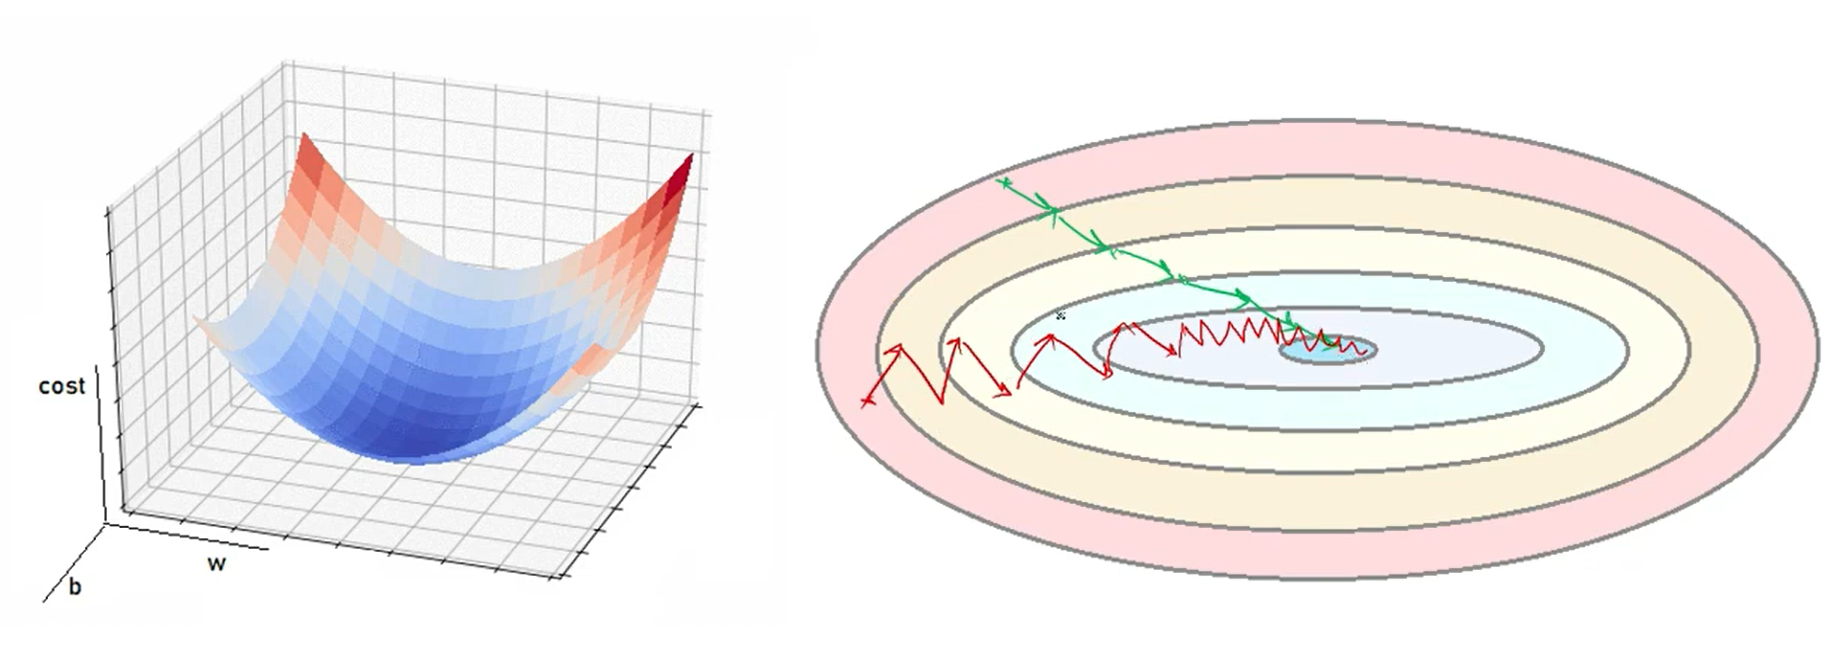

In [1]:
from IPython.display import display, Image
display(Image(filename="Adam_opt.png", height=400, width=400))


Das Ziel dieses <span style="color:#be020c">Algorithmus</span> (dargestellt in rot) ist es, die <span style="color:#18739e">horizontale Bewegung</span> zu verstärken und gleichzeitig die <span style="color:#18739e">vertikale Bewegung</span> zu reduzieren, um auf diesem Weg das lokale Minimum zu finden.
Dazu wird folgende Formel verwendet, die eine allgemeinere Form der Formeln 1. und 2. darstellt: $ V_{t}=\beta*V_{t-1}+(1-\beta)*\theta_t $. <br>
Mit jedem Datenpunkt wird das (Durchschnitts-)Gewicht neu berechnet. Dabei muss bei jeder Neuberechnung von V abhängig von der Zeit immer das Gewicht des vorherigen Datenpunktes bzw. Schrittes mit berücksichtigt werden. $\beta$ wird dabei zwischen Null und Eins gewählt ($0<\beta<1$). 

Diese Formel kann für die <span style="color:#18739e">horizontale Bewegung</span>, wie auch für die <span style="color:#18739e">vertikale Bewegung</span> eingesetzt werden, sollte aber anhand der Variablenbezeichnungen leicht angepasst werden. Die Formeln 3. und 4. stellen die eigentliche Bewegung dar, die abhängig von der jeweiligen Gewichtung aus 1. oder 2. ist.

Visualisiert kann dies folgendermaßen dargestellt werden (dabei zeigt die rote Linie das Durchschnittsgewicht an jeder Stelle der Punkte an).


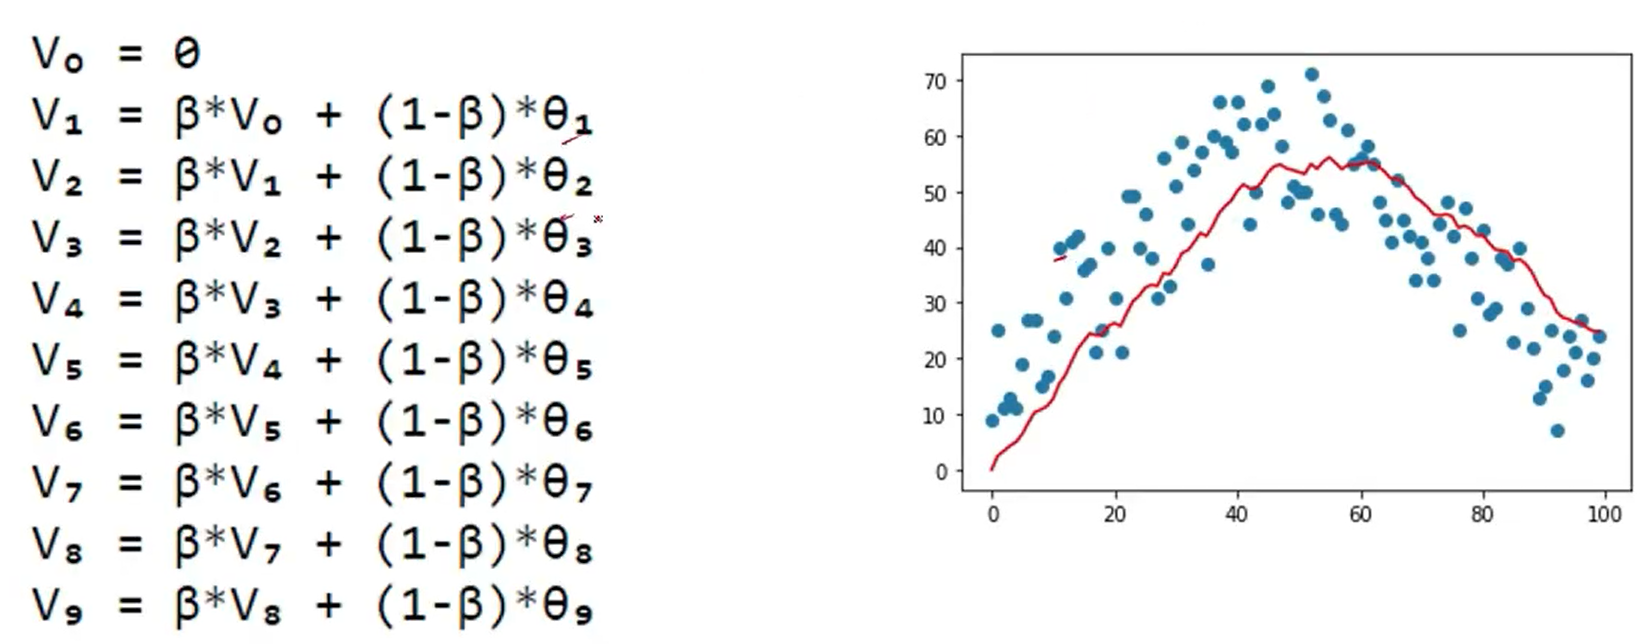

In [2]:
from IPython.display import display, Image
display(Image(filename="Adam_v.png", height=400, width=400))


RMSprop ([RMSprop Optimizer Explained in Detail, 2021](#q-coding-lane-rmsprop)):

5. $ S_{dW}=\beta*S_{dW_{prev}}+(1-\beta)*(dW)^2 $ <br>
6. $ S_{dB}=\beta*S_{dB_{prev}}+(1-\beta)*(dB)^2 $ <br>
7. $ W=W-\alpha*(\frac{dW}{\sqrt{S_{dW}+\epsilon}}) $ <br>
8. $ B=B-\alpha*(\frac{dB}{\sqrt{S_{dB}+\epsilon}}) $ <br>

RMSprop verfolgt das gleiche Ziel, nur mit einer geringfügig abgewandelten Methodik. Bei 5. und 6. wird der dW und dB Wert quadiert.
Zur Unterscheidung wird der berechnete Faktor mit S abgekürzt und nicht wie bei Momentum mit V.
Wächst somit der Faktor, z.B. $S_{dW}$ so wird die <span style="color:#18739e">vertikale Bewegung</span> reduziert. Das gilt invertiert auch für die <span style="color:#18739e">horizontale Bewegung</span>. Umso kleiner der Faktor, desto größer ist die <span style="color:#18739e">horizontale Bewegung</span>. Damit kann auch schneller das lokale Minimum erreicht werden. Grund dafür ist, dass der Faktor für die Bewegungsberechnung im Nenner steht und somit für einen kleinen Wert sorgt. Aus diesem Optimierungsvorgehen ergibt sich auch die Bezeichnung von RMSprop - Root Mean Square propagation.


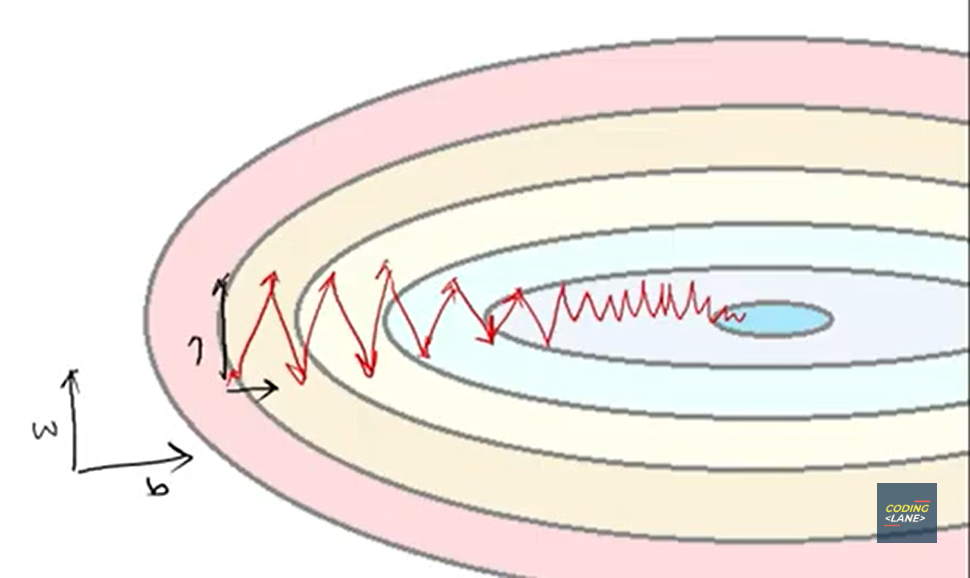

In [3]:
from IPython.display import display, Image
display(Image(filename="RMSprop_wb.png", height=400, width=400))


Werden diese beiden Optimierer in der Folge kombiniert, so ergibt sich für die <span style="color:#18739e">horizontale Bewegung</span> folgende Gleichung:
$$W=W-\alpha*(\frac{V_{dW}}{\sqrt{S_{dW}+\epsilon}})$$

Für die <span style="color:#18739e">vertikale Bewegung</span> ergibt sich diese Gleichung:
$$ B=B-\alpha*(\frac{V_{dB}}{\sqrt{S_{dB}+\epsilon}}) $$

# Beispiel <a name="beispiel" id="beispiel"></a>

Im Folgenden wird eine Beispielimplementierung in Python beschrieben. Die Implementierung basiert auf einem Beispiel von [Enoch Kan, 2020](#q-enoch-kan-2020-b). Das Beispiel verwendet die Biblliotheken numpy und math.

Um den Adam Algorithmus zu initialisieren müssen einige Variablen definiert werden:

- alpha ($\alpha$) = Schrittgröße
- beta1 ($\beta_1$) und beta2 ($\beta_2$) = Gewichtung neuerer Werte gegenüber älteren Werten. beta1 fasst den Mittelwert und beta2 die unzentrierte Varianz zusammen. Bei der unzentrierten Varianz handelt es sich um den reinen Varianzwert ohne Abzug des Mittelwerts.
- epsilon ($\epsilon$) = Konstante, damit beim Updaten von  nicht durch null geteilt wird.

In jeder Iteration des Algorithmus werden folgende Schritte durchgeführt: Im Ersten Schritt werden die Gewichte und der Bias von $\beta_1$ und $\beta_2$ berechnet. Dazu werden $m_t$ (der Mittelwert) und $v_t$ (die Varianz) über die Formeln  
$m_t = \beta_t * m_{t-1} + (1- \beta_1) * g_t$ und $v_t = \beta_t * v_{t-1} + (1- \beta_2) * g^2_t$ berechnet.

Die gleitenden Mittelwerte werden über die Parameter $\beta_1$ und $\beta_2$ und den Gradienten $g_t$ berechnet. Dieser Schritt wird Bias Correction genannt und wird über folgende Formeln $\hat{m}_t = \frac{m_t}{1-\beta^t_1}$ und $\hat{v}_t = \frac{v_t}{1-\beta^t_2}$ durchgeführt. Die Gewichte und der Bias werden mit Hilfe der Schrittgröße $\alpha$ aktuallisiert.

In [4]:
# dw = Weights of the previous timestep
# db = biases of the previous timestep
# m = mean
# v = uncentered variance
# m_dw = mean of the Weights of the previous timestep
# m_db = mean of the biases of the previous timestep
# v_dw = uncentered variance of the Weights of the previous timestep
# v_db = uncentered variance of the biases of the previous timestep
import numpy as np
class AdamOptim():
    # inititalze the adam parameters
    def __init__(self, alpha=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.alpha = alpha
    def update(self, t, w, b, dw, db):
        ## dw, db are from current minibatch
        ## momentum beta 1
        # weights
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # biases
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # weights
        # update biased second raw moment estimate
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # biases
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.alpha*(m_dw_corr/(np.sqrt(abs(v_dw_corr))+self.epsilon))
        b = b - self.alpha*(m_db_corr/(np.sqrt(abs(v_db_corr))+self.epsilon))
        return w, b

In [5]:
def loss_function(m):
    return m**2-2*m+1
## take derivative
def grad_function(m):
    return 2*m-2
# check if the current weight is the same as the previous weight
def check_convergence(w0, w1):
    return (w0 == w1)
  
# inititialize Adam object
w_0 = 0
b_0 = 0
adam = AdamOptim()
t = 1 
converged = False

while not converged:
    dw = grad_function(w_0)
    db = grad_function(b_0)
    w_0_old = w_0
    w_0, b_0 = adam.update(t,w=w_0, b=b_0, dw=dw, db=db)
    if check_convergence(w_0, w_0_old):
        print('converged after '+str(t)+' iterations')
        break
    else:
        print('iteration '+str(t)+': weight='+str(w_0))
        t+=1

iteration 1: weight=0.009999999950000001
iteration 2: weight=0.01999725400385255
iteration 3: weight=0.029989900621600046
iteration 4: weight=0.039976060276935343
iteration 5: weight=0.049953839711732076
iteration 6: weight=0.05992133621693422
iteration 7: weight=0.06987664190678831
iteration 8: weight=0.07981784795404925
iteration 9: weight=0.08974304875491491
iteration 10: weight=0.0996503459940126
iteration 11: weight=0.10953785258172263
iteration 12: weight=0.11940369643843479
iteration 13: weight=0.12924602410293135
iteration 14: weight=0.13906300414491304
iteration 15: weight=0.14885283036466956
iteration 16: weight=0.15861372476597732
iteration 17: weight=0.1683439402914239
iteration 18: weight=0.17804176331244895
iteration 19: weight=0.1877055158694015
iteration 20: weight=0.19733355765979776
iteration 21: weight=0.2069242877756729
iteration 22: weight=0.21647614619342795
iteration 23: weight=0.22598761502184558
iteration 24: weight=0.23545721951596985
iteration 25: weight=0.24

# Einsatzbereich <a name="einsatzbereich" id="einsatzbereich"></a>

Der Adam Optimierer wurde entwickelt, um den Lernprozess neuronaler Netzwerke zu optimieren [Bushaev, 2018](#q-bushaev-2018). Adam kann zum Beispiel dafür verwendet werden, um Pixeländerungen an Bildern durchzuführen, ohne den Hashwert zu verändern. Struppek et al. [Struppek et al., 2022, S. 6f](#q-struppek-et-al-2022) konten zeigen, das mit Adam Hash Kollisionen forciert oder vermieden werden können. Dadurch ist es unter anderem möglich kleine Änderungen an den Pixeln von Bildern vorzunehmen, ohne den Hash-Wert zu ändern. Apple verwendet den Hash-Wert von Bildern um Kinderpornografie in Bildern von Nutzern der iCloud zu identifizieren. Mit Hilfe von Optimierern, wie Adam, können Bildinformationen manipuliert und Personen belastende Bilder untergeschoben werden, deren Hash-Wert mit einem Hash-Wert aus einer Child Sexual Abuse Material (CSAM) Datenbank übereinstimmt [Struppek et al., 2022, S. 1](#q-struppek-et-al-2022).

Jais et al. [Jais et al., 2019, S. 1](#q-jais-2019) konnten zeigen, das Adam in tiefen und weiten neuronalen Netzwerken verwendet werden kann, um deren Leistung zu verbessern. Als Grundlage für das tiefe und weite neuronale Netzwerk wurden Daten zu Brustkrebs verwendet. Diese wurden korelliert, um Muster im Datensatz zu erkennen. Daraufhin wurde mit den Daten das tiefe und weite neuronale Netzwerk trainiert. Der Trainingsprozess wurde mit Adam optimiert [Jais et al., 2019, S. 43f.](#q-jais-2019).

# Limitierungen <a name="limitierungen" id="limitierungen"></a>

Adam ist einer der Standard-Algorithmen, wenn es darum geht, adaptive Gradientenmethoden in Deep-Learning einzusetzen [Tang et al., 2019, S. 1f](#q-tang-et-al-2019). Jedoch zeigt sich, dass der Adam Optimierer und weitere adaptive Optimierungsmethoden im Vergleich mit dem stochastischen Gradientenabstieg (SGD) nicht so gut generalisieren. Als Generalisierung wird die Übertragung der aus den Trainingsdaten gefundenen Erkenntnisse auf Realdaten bezeichnet. 
Adam schneidet bei Trainingsdaten gut ab. Bei Testdaten liefert jedoch SGD bessere Ergebnisse. Der Leistungsunterschied zwischen SGD und Adam, die Generalisierungslücke genannt, liegt bei zwei Prozent[Tang et al., 2019, S. 1f](#q-tang-et-al-2019).


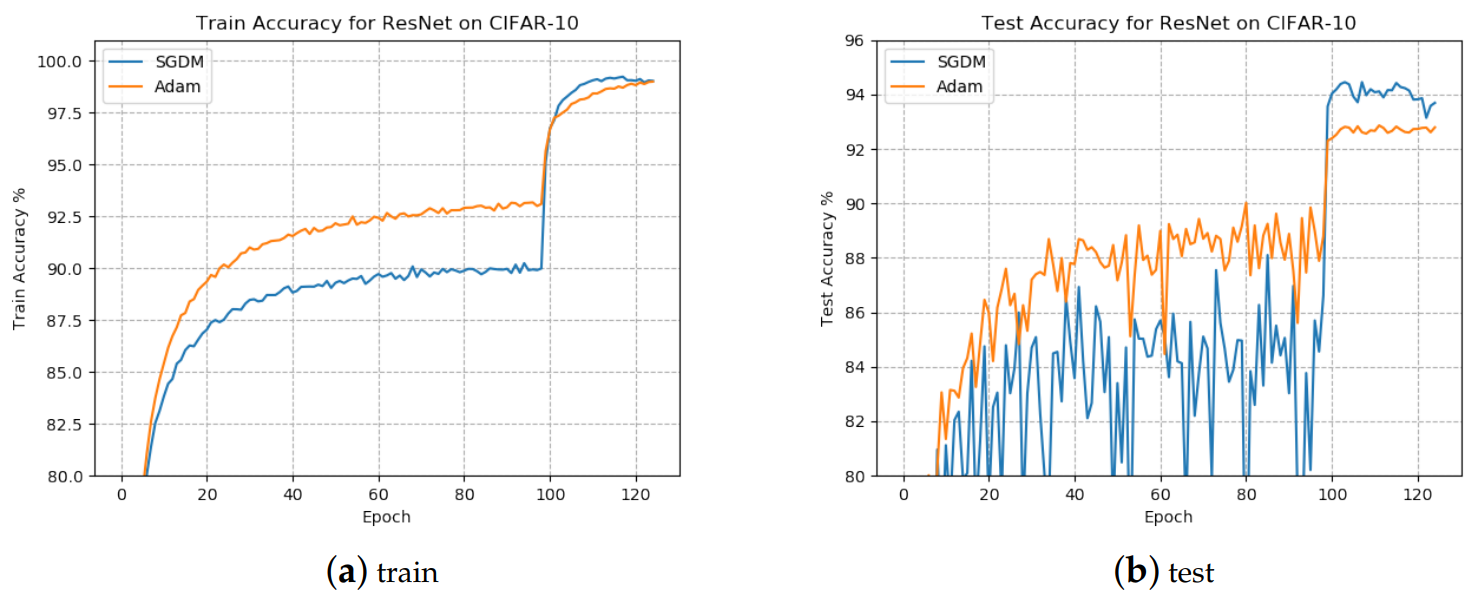

In [6]:
from IPython.display import display, Image
display(Image(filename="Tang-et-al.png", height=400, width=400))


**Abbildung:** Training der ResNet-34-Architektur auf dem CIFAR-10-Datensatz mit stochastischem Gradientenabstieg
(SGD) und Adam. Adam hat eine schnellere anfängliche Konvergenzgeschwindigkeit, aber die endgültige Testgenauigkeit ist niedriger als
die von SGD [Tang et al., 2019, S. 1f](#q-tang-et-al-2019).

Zum besseren Verständnis werden im Folgenden wichtige Aspekte von SGD und ADAM beschrieben.
SGD berechnet nur auf einer kleinen Teilmenge einer zufälligen Auswahl von Datenbeispielen den Gradientenabstieg. Das hat zur Folge, dass die Lernrate niedriger ist, die "Leistung" entspricht allerdings der eines normalen Gradientenabstiegs.
Im direkten Vergleich dazu berechnet ADAM die Lernrate für verschiedene Parameter aus Schätzungen des ersten und zweiten Momentums. Dabei werden die Vorteile von RMSprop und AdaGrad kombiniert, um adaptive Lernraten für verschiedene Parameter zu berechnen.

Kaur et al. ([Kaur, 2022](#q-kaur-2022), [Kaur, 2022, Poster, 2020-NIPS-SGD-poster](#q-kaur-2022)) haben folgende Problembereiche bei Adam identifiziert, die für die schlechte Generalisierungsfähigkeit verantwortlich sind:
- **Ungleiche Skalierung der Gradienten**  
  Das kann zur Folge haben, dass für adaptive Gradientenmethoden eine schlechte Generalisierungsleistung zustande kommt. SGD skaliert glechmäßiger und etwaige Trainingsfehler können besser verallgemeinert werden.
- **Exponentiell gleitender Durchschnitt**  
  In Adam wird ein sogenannter exponentiell gleitender Durchschnitt eingesetzt, der die Lernrate nicht monoton sinken lassen kann. Die Folge daraus ist eine suboptimale Lösung und eine schlechte Generalisierungsleistung.
- **Unter Umständen zu geringe Lernrate**  
  Wenn Adam mit einer zu niedrigen Lernrate konfiguriert wird, kommt es zu keiner effektiven Konvergenz. Dadurch findet Adam nicht den richtigen Pfand, wodurch der Optimierer zu einem supotimalen Punkt konvergiert.
- **Unter Umständen stark steigende Lernrate**  
  Um zu konvergieren erhöht Adam manchmal die Lernrate. Tritt dieser Fall ein, so wirkt sich das negativ auf die Leistung des Algorithmus aus.

Allerdings können die Grenzen von ADAM durch Einsatz der Strategie SWATS überwunden werden. Nitish Shirish Keskar und Richard Socher haben untersucht, wie die Generalisierungsleistung durch den Wechsel von ADAM zu SGD verbessert werden kann [Bushaev, 2018, Problems with Adam](#q-bushaev-2018). Im dazugehörigen Paper wird die SWATS Strategie vorgestellt, was so viel bedeutet wie "**Sw** from **A**dam **t**o **S**GD". Das heißt, dass nur zu SGD gewechselt wird, wenn eine Bedingung eintritt [Keskar et al., 2020, S. 2ff](#q-keskar-et-al-2020).
Die Bedingung ist folgendermaßen aufgebaut:
$$\left| \frac{\lambda_k}{1-\beta_2^k}-\gamma_k \right| < \epsilon,$$
Dabei wird der verzerrungskorrigierte exponentieller Mittelwert mit dem aktuellen Wert $\gamma_k$ verglichen. Die Bias-Korrektur ist notwendig, um während dem Training zu verhindern, dass die Null-Initialisierung einen Einfluss hat. Wenn diese Bedingung erfüllt ist, wird die Lernrate von SGD mit $\Lambda:=\frac{\lambda_k}{(1-\beta_2^k)}$ gewählt [Keskar et al., 2020, S. 4f](#q-keskar-et-al-2020).

In nachfolgendem Diagramm ist zu sehen, wie sich der Switch zu SGD je nach fortgeschrittener Epoche auswirkt.


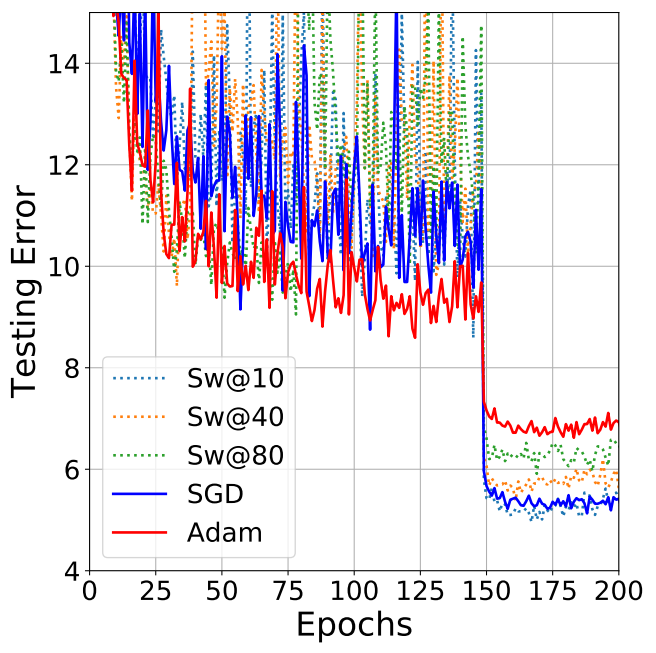

In [7]:
from IPython.display import display, Image
display(Image(filename="Epochs.png", height=400, width=400))


Dabei wird vermehrt darauf hingewiesen, dass der Switch zum richtigen Zeitpunkt erfolgen muss. Wenn zu spät zu SGD gewechselt wird, erhält man ähnlich wie bei ADAM eine Generalisierungslücke. Ein früher Wechsel führt zu einer mit SGD vergleichbaren Testgenauigkeit [Keskar et al., 2020, S. 3f](#q-keskar-et-al-2020).

# Alternativen & Abgrenzung <a name="alternativen-abgrenzung" id="alternativen-abgrenzung"></a>

Im folgenden Abschnitt wird Adam von anderen Optimierungsmethoden abgegrenzt. Es werden folgende Optimierungsmethoden besprochen:
- RMSProp - [Tielemann & Hinton, 2012](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)
- AdaGrad - [Duchi et al., 2011](https://dl.acm.org/doi/pdf/10.5555/1953048.2021068)
- vSGD - [Schaul et al., 2012](https://arxiv.org/abs/1206.1106)
- AdaDelta - [Zeiler, 2012](https://arxiv.org/abs/1212.5701)
- natürliche Newton-Methode - [Roux & Fitzgibbon, 2010](https://icml.cc/Conferences/2010/papers/438.pdf)
- SFO - [Sohl-Dicksein et al., 2014](https://dl.acm.org/doi/proceedings/10.5555/3044805)
- NGD - [Amari, 1998](https://doi.org/10.1162/089976698300017746)

vSGD, AdaDelta und die natürliche Newton-Methode schätzen die Krümmung aus Informationen erster Ordnung und setzen anhand dieser Informationen die Schrittweite.
Der SFO (Sum-of-Functions Optimierer) ist ein quasi-Newton-Verfahren, das auch Minibatches aufbaut. Im Gegensatz zum Adam Optimierer hat der SFO einen linearen Speicherbedarf in der Anzahl der Minibatch-Partitionen eines Datensatzen. SFO ist deswegen auf speicherbeschränkten Systemen, wie zum Beispiel einer GPU, meist nicht ausführbar.

Bei RMSProp (Root Mean Square Propagation) handelt es sich um einen Optimierer, der eng mit dem Adam Optimierer verwandt ist. Es kann auch vorkommen, dass eine Version mit Momentum eingesetzt wird [Graves, 2013](#q-graves-2014). Wird RMSProp mit Momentum eingesetzt, so werden die Parameteraktualisierungen anhand eines Momentums auf dem neu skalierten Gradienten generiert. Beim Adam Optimierer werden die Aktualisierungen anhand eines Durchschnitts des ersten und zweiten Momentums des Gradienten geschätzt. Bei RMSProb wird der Bias nicht korrigiert. Eine Biaskorrektur wäre jedoch notwendig, wenn ein Wert von $\beta _{2}$ nahe dem Wert eins (1) ist. In diesem Fall kann eine Nichtkorrektur des Bias zu sehr großen Schrittweiten führen, woraus sich eine Divergenz entwickeln kann [Diederik et al., 2017, S. 5,8](#q-diederik-adam) [siehe 6.4].
RMSProp und Adadelta zeilen sich den gleichen Update-Vektor:
$$E[g^2]_t = 0.9E[g^2]_{t-1}+0.1g^2_t$$
$$\theta_{t+1}=\theta_t-\frac{\eta}{\sqrt{E[g^2]_t+\varepsilon}}g_t$$

Der AdaGrad Algorithmus passt die Lernrate an die Parameter an und führt kleine Aktualisierungen für Parameter durch, die mit häufig auftretenden Features verbunden sind. Größere Aktualisierungen werden für Parameter durchgeführt, die mit seltenen Features verbunden sind [Ruder, 2016](#q-ruder-2016); [Dean et al., 2012](#q-dean-et-al-2012).


# Fazit <a name="fazit" id="fazit"></a>

Der Adam Optimierer kombiniert die positiven Eigenschaften von AdaGrad und RMSProb. Also die effiziente Verarbeitung von "Sparse Gradients" von AdaGrad und die gute Performance in nicht stationären Umgebungen von RMSProb. Adam hat unter Verwendung der Standardparameter eine gute Performance und Geschwindigkeit und kann mit "Sparse Gradients" umgehen. 
Leider ist die Generalisierungsfähigkeit von Adam geringer als das Standardverfahren SGD. Das liegt primär an der, im Vergleich zu SGD, ungleichen Skalierung der Gradienten. Außerdem leidet die Leistung von Adam sehr stark an zu gering gewählten Lernraten, wodurch Adam zu supoptimalen Punkten konvergiert. Diese Nachteile können durch eine Kombination aus Adam und SGD umgangen werden. Die SWATS Strategie verwendet Adam am Anfang für Optimierungen und wechselt später zu SGD für eine bessere Leistung des trainierten Modells auf Realdaten.

Der Adam Optimierer ist ein guter Standard Optimierer, welcher in vielen Situationen angewandt werden kann. Jedoch sollten Nutzern die Limitierungen von Adam bekannt sein, um bestmögliche Ergebnisse zu erzielen. Im Zweifelsfall bietet sich eine Kombination mit SGD (SWATS Strategie) oder ein alleiniges Verwenden von SGD für die beste Leistung des trainierten Modells an.

---

# Quellen <a name="quellen" id="quellen"></a>

### <a name="eingesetzte-quellen" id="eingesetzte-quellen"></a> Eingesetzte Quellen

1. <a id="q-rueschendorf-2014" name="q-rueschendorf-2014"></a><style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Mathematische Statistik</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Ludger Rüschendorf</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">2014</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://link.springer.com/book/10.1007/978-3-642-41997-3" target="_blank" rel="noopener noreferrer">https://link.springer.com/book/10.1007/978-3-642-41997-3</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

2. <a id="q-datarobot-2018" name="q-datarobot-2018"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Introduction to Loss Functions</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">DataRobot</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">30. April 2018</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://www.datarobot.com/blog/introduction-to-loss-functions/" target="_blank" rel="noopener noreferrer">https://www.datarobot.com/blog/introduction-to-loss-functions/</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

3. <a id="q-quinnradich-2022" name="q-quinnradich-2022"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Was ist ein Machine Learning-Modell?</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">QuinnRadich, v-alje, eliotcowley</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">2. Dezember 2022</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://learn.microsoft.com/de-de/windows/ai/windows-ml/what-is-a-machine-learning-model" target="_blank" rel="noopener noreferrer">https://learn.microsoft.com/de-de/windows/ai/windows-ml/what-is-a-machine-learning-model</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

4. <a id="q-murdoch-2019" name="q-murdoch-2019"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Interpretable machine learning: definitions, methods, and applications</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">James W. Murdoch, Chandan Singh, Karl Kumbier, Reza Abbasi-Asl, Bin Yu</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">14. Januar 2019</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://arxiv.org/pdf/1901.04592.pdf?fbclid=IwAR2frcHrhLc4iaH5-TmKKq263NVvAKHtG4uQoiVNDeLAG3QFzdje-yzZjiQ" target="_blank" rel="noopener noreferrer">https://arxiv.org/pdf/1901.04592.pdf?fbclid=IwAR2frcHrhLc4iaH5-TmKKq263NVvAKHtG4uQoiVNDeLAG3QFzdje-yzZjiQ</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

5. <a id="q-studyflix-gradienten" name="q-studyflix-gradienten"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Gradienten berechnen</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">studyflix</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">-- keine Angabe --</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://studyflix.de/mathematik/gradient-berechnen-1350" target="_blank" rel="noopener noreferrer">https://studyflix.de/mathematik/gradient-berechnen-1350</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

6. <a id="q-data-robot-2018" name="q-data-robot-2018"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Introduction to Optimizers</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">DataRobot</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">7. Mai 2018</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://www.datarobot.com/blog/introduction-to-optimizers/" target="_blank" rel="noopener noreferrer">https://www.datarobot.com/blog/introduction-to-optimizers/</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

7. <a id="q-enoch-kan-2020-b" name="q-enoch-kan-2020-b"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Step 1: Understand how Adam works</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Enoch Kan</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">6. November 2020</td>
  </tr>
  <tr>
    <td class="tg-zv4m" rowspan="2">Source:</td>
    <td class="tg-swfa"><a href="https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc" target="_blank" rel="noopener noreferrer">https://towardsdatascience.com/how-to-implement-an-adam-optimizer-from-scratch-76e7b217f1cc</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m"><a href="https://miro.medium.com/max/390/0*F9hIO3J8_i2F0p3y.webp" target="_blank" rel="noopener noreferrer">https://miro.medium.com/max/390/0*F9hIO3J8_i2F0p3y.webp</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

8. <a id="q-diederik-adam" name="q-diederik-adam"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Adam: A Method for Stochastic Optimization</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Diederik P. Kingma, Jimmy Ba</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">30. Januar 2017</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://arxiv.org/abs/1412.6980" target="_blank" rel="noopener noreferrer">https://arxiv.org/abs/1412.6980</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

9. <a id="q-duchi-2011" name="q-duchi-2011"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Adaptive Subgradient Methods for Online Learning and Stochastic Optimization</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">John Duchi, Elad Hazan, Yoram Singer</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">11 Juli 2011</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://dl.acm.org/doi/pdf/10.5555/1953048.2021068" target="_blank" rel="noopener noreferrer">https://dl.acm.org/doi/pdf/10.5555/1953048.2021068</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

10. <a id="q-coding-lane-mo-ewma" name="q-coding-lane-mo-ewma"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Momentum Optimizer in Deep Learning | Explained in Detail</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Coding Lane</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">21. August 2021</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://youtu.be/Vce8w1sy0e8" target="_blank" rel="noopener noreferrer">https://youtu.be/Vce8w1sy0e8</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

11. <a id="q-coding-lane-rmsprop" name="q-coding-lane-rmsprop"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">RMSprop Optimizer Explained in Detail | Deep Learning</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Coding Lane</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">27. August 2021</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://youtu.be/ajI_HTyaCu8" target="_blank" rel="noopener noreferrer">https://youtu.be/ajI_HTyaCu8</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

12. <a id="q-ruder-2016" name="q-ruder-2016"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Titel:</td>
    <td class="tg-zv4m">An overview of gradient descent optimization algorithms</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Autor:</td>
    <td class="tg-zv4m">Sebastian Ruder</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Datum:</td>
    <td class="tg-zv4m">19 January 2016</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-zv4m"><a href="https://ruder.io/optimizing-gradient-descent/index.html#adagrad" target="_blank" rel="noopener noreferrer"><span style="color:#05F">https://ruder.io/optimizing-gradient-descent/index.html#adagrad</span></a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

13. <a id="q-graves-2014" name="q-graves-2014"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Generating Sequences With Recurrent Neural Networks</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Alex Graves</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">5. Juni 2014</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://arxiv.org/abs/1308.0850" target="_blank" rel="noopener noreferrer">https://arxiv.org/abs/1308.0850</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">13. Dezember 2022</td>
  </tr>
</tbody>
</table>

14. <a id="q-bushaev-2018" name="q-bushaev-2018"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Adam — latest trends in deep learning optimization.</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Vitaly Bushaev</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">22. October 2018</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c" target="_blank" rel="noopener noreferrer">https://towardsdatascience.com/adam-latest-trends-in-deep-learning-optimization-6be9a291375c</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">14. Dezember 2022</td>
  </tr>
</tbody>
</table>

15. <a id="q-keskar-et-al-2020" name="q-keskar-et-al-2020"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Improving Generalization Performance by Switching from Adam to SGD</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Nitish Shirish Keskar, Richard Socher</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">20. Dezember 2020</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://arxiv.org/abs/1712.07628" target="_blank" rel="noopener noreferrer">https://arxiv.org/abs/1712.07628</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">14. Dezember 2022</td>
  </tr>
</tbody>
</table>

16. <a id="q-struppek-et-al-2022" name="q-struppek-et-al-2022"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Learning to Break Deep Perceptual Hashing: The Use Case NeuralHash</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Lukas Struppek, Dominik Hintersdorf, Daniel Neider, Kristian Kersting
</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">9. Juni 2022</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://arxiv.org/pdf/2111.06628.pdf" target="_blank" rel="noopener noreferrer">https://arxiv.org/pdf/2111.06628.pdf</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">14. Dezember 2022</td>
  </tr>
</tbody>
</table>

17. <a id="q-jais-2019" name="q-jais-2019"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Adam Optimization Algorithm for Wide and Deep Neural Network</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Imran Khan Mohd Jais, Amelia Ritahani Ismail, Syed Qamrun Nisa</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">23. Juni 2019</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="http://journal2.um.ac.id/index.php/keds/article/view/6775/0" target="_blank" rel="noopener noreferrer">http://journal2.um.ac.id/index.php/keds/article/view/6775/0</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">14. Dezember 2022</td>
  </tr>
</tbody>
</table>

18. <a id="q-hinton-2012" name="q-hinton-2012"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Overview	of	mini-batch	gradient	descent</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Geoffrey Hinton, Nitish Srivastava, Kevin Swersky</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">2012</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf" target="_blank" rel="noopener noreferrer">https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">14. Dezember 2022</td>
  </tr>
</tbody>
</table>

19. <a id="q-tang-et-al-2019" name="q-tang-et-al-2019"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">A Bounded Scheduling Method for Adaptive Gradient Methods</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Mingxing Tang, Zhen Huang, Yuan Yuan, Changjian Wang, Yuxing Peng</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">1. September 2019</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://www.mdpi.com/2076-3417/9/17/3569" target="_blank" rel="noopener noreferrer">https://www.mdpi.com/2076-3417/9/17/3569</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">16. Dezember 2022</td>
  </tr>
</tbody>
</table>

20. <a id="q-kaur-2022" name="q-kaur-2022"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Why Should adam Optimizer Not be the Default Learning Algorithm?</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Harjot Kaur</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">20. August 2022</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://pub.towardsai.net/why-adam-optimizer-should-not-be-the-default-learning-algorithm-a2b8d019eaa0" target="_blank" rel="noopener noreferrer">https://pub.towardsai.net/why-adam-optimizer-should-not-be-the-default-learning-algorithm-a2b8d019eaa0</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">16. Dezember 2022</td>
  </tr>
</tbody>
</table>

21. <a id="q-kaur-2022" name="q-kaur-2022"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Towards Theoretically Understanding Why SGD Generalizes Better Than ADAM in Deep Learning</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Pan Zhou, Jiashi Feng, Chao Ma, Caiming Xiong, Steven HOI, Weinan E</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">29. November 2021</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://panzhous.github.io/assets/pdf/2020-NIPS-SGD-poster.pdf" target="_blank" rel="noopener noreferrer">https://panzhous.github.io/assets/pdf/2020-NIPS-SGD-poster.pdf</a>;<br><a href="https://panzhous.github.io/#2020">(https://panzhous.github.io/#2020)</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">16. Dezember 2022</td>
  </tr>
</tbody>
</table>

22. <a id="q-dean-et-al-2012" name="q-kaur-2022"></a> <style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:5px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:5px 5px;word-break:normal;}
.tg .tg-zv4m{border-color:#ffffff;text-align:left;vertical-align:top}
.tg .tg-swfa{border-color:#ffffff;color:#0055ff;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
  <tr>
    <td class="tg-zv4m">Title:</td>
    <td class="tg-zv4m">Large Scale Distributed Deep Networks</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Authors:</td>
    <td class="tg-zv4m">Jeffrey Dean, Greg S. Corrado, Rajat Monga, Kai Chen, Matthieu Devin, Quoc V. Le, Mark Z. Mao, Marc’Aurelio Ranzato, Andrew Senior, Paul Tucker, Ke Yang, Andrew Y. Ng</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Date:</td>
    <td class="tg-zv4m">2012</td>
  </tr>
  <tr>
    <td class="tg-zv4m">Source:</td>
    <td class="tg-swfa"><a href="https://proceedings.neurips.cc/paper/2012/file/6aca97005c68f1206823815f66102863-Paper.pdf" target="_blank" rel="noopener noreferrer">https://proceedings.neurips.cc/paper/2012/file/6aca97005c68f1206823815f66102863-Paper.pdf</a>;<br><a href="https://proceedings.neurips.cc/papers/search?q=large+scale+distributed+deep+networks">(https://proceedings.neurips.cc/papers/search?q=large+scale+distributed+deep+networks)</a></td>
  </tr>
  <tr>
    <td class="tg-zv4m">Zuletzt aufgerufen am:</td>
    <td class="tg-zv4m">18. Dezember 2022</td>
  </tr>
</tbody>
</table>

### <a name="weiterfuehrende-quellen" id="weiterfuehrende-quellen"></a> Weiterführende Quellen

* [Neural Networks for Machine Learning - Overview of mini-batch gradient descent](https://www.cs.toronto.edu/~tijmen/csc321/slides/lecture_slides_lec6.pdf)
* [Adaptive Subgradient Methods for Online Learning and Stochastic Optimization](https://dl.acm.org/doi/pdf/10.5555/1953048.2021068)
* [No More Pesky Learning Rates](https://arxiv.org/abs/1206.1106)
* [ADADELTA: An Adaptive Learning Rate Method](https://arxiv.org/abs/1212.5701)
* [A fast natural Newton method](https://icml.cc/Conferences/2010/papers/438.pdf)
* [Proceedings of the 31st International Conference on International Conference on Machine Learning - Volume 32](https://dl.acm.org/doi/proceedings/10.5555/3044805)
* [Natural Gradient Works Efficiently in Learning](https://direct.mit.edu/neco/article-abstract/10/2/251/6143/Natural-Gradient-Works-Efficiently-in-Learning?redirectedFrom=fulltext)